# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

Again, I'll load the NSFG pregnancy file and select live births:

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights:

Hist({7.0: 3049, 6.0: 2223, 8.0: 1889, 5.0: 697, 9.0: 623, 4.0: 229, 10.0: 132, 3.0: 98, 2.0: 53, 1.0: 40, 11.0: 26, 12.0: 10, 0.0: 8, 13.0: 3, 14.0: 3, 15.0: 1})

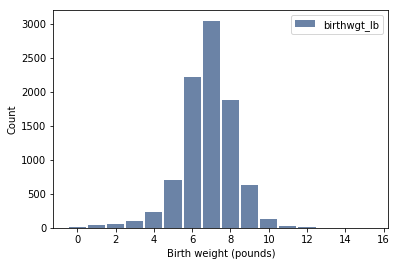

In [8]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')
hist

To normalize the disrtibution, we could divide through by the total count:

In [42]:
n = hist.Total()
print(n)
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n
    print(freq, pmf[x])    

9084
3049 0.335645090269
2223 0.244715984148
1889 0.207948040511
697 0.0767283135183
623 0.068582122413
229 0.0252091589608
132 0.0145310435931
98 0.0107881990313
53 0.00583443416997
40 0.00440334654337
26 0.00286217525319
10 0.00110083663584
8 0.000880669308675
3 0.000330250990753
3 0.000330250990753
1 0.000110083663584


The result is a Probability Mass Function (PMF).

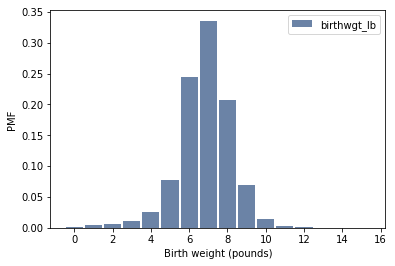

In [44]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

More directly, we can create a Pmf object.

In [52]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

`Pmf` provides `Prob`, which looks up a value and returns its probability:

In [53]:
pmf.Prob(2)

0.4

The bracket operator does the same thing.

In [54]:
pmf[2]

0.4

The `Incr` method adds to the probability associated with a given values.

In [55]:
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

The `Mult` method multiplies the probability associated with a value.

In [57]:
pmf.Mult(2, 0.5)
print(pmf[2], 0.6*0.5)

0.15000000000000002 0.3


`Total` returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [58]:
pmf.Total()

0.75

`Normalize` divides through by the total probability, making it 1 again.

In [59]:
pmf.Normalize()
pmf.Total()

1.0

Here's the PMF of pregnancy length for live births.

In [61]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')
pmf

Pmf({39: 0.51300830782684737, 40: 0.1219938784433756, 38: 0.066353301268036735, 41: 0.064167031045037168, 37: 0.049737647573240056, 42: 0.035854831657192832, 36: 0.035089637079142984, 35: 0.0339965019676432, 43: 0.016178399650196764, 30: 0.015085264538696984, 32: 0.012571053782247486, 34: 0.006558810668998688, 33: 0.005356362046348929, 44: 0.005028421512898994, 26: 0.003825972890249235, 28: 0.0034980323567993005, 31: 0.00295146480104941, 29: 0.002295583734149541, 24: 0.0014210756449497158, 45: 0.0010931351114997815, 22: 0.00076519457804984699, 48: 0.00076519457804984699, 27: 0.00032794053344993443, 25: 0.00032794053344993443, 17: 0.00021862702229995628, 50: 0.00021862702229995628, 21: 0.00021862702229995628, 9: 0.00010931351114997814, 47: 0.00010931351114997814, 18: 0.00010931351114997814, 19: 0.00010931351114997814, 4: 0.00010931351114997814, 20: 0.00010931351114997814, 13: 0.00010931351114997814, 46: 0.00010931351114997814, 23: 0.00010931351114997814, 0: 0.00010931351114997814})

Here's what it looks like plotted with `Hist`, which makes a bar graph.

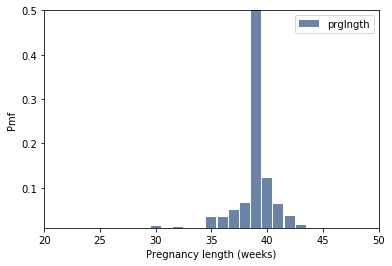

In [69]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf', xlim=[20,50], ylim =[0.01, 0.5])

Here's what it looks like plotted with `Pmf`, which makes a step function.

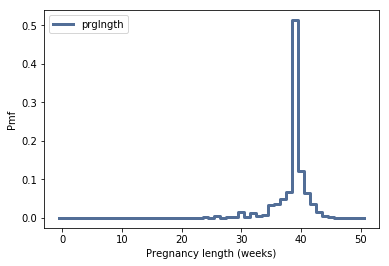

In [70]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [72]:
live, firsts, others = first.MakeFrames()

Here are the distributions of pregnancy length.

In [73]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

And here's the code that replicates one of the figures in the chapter.

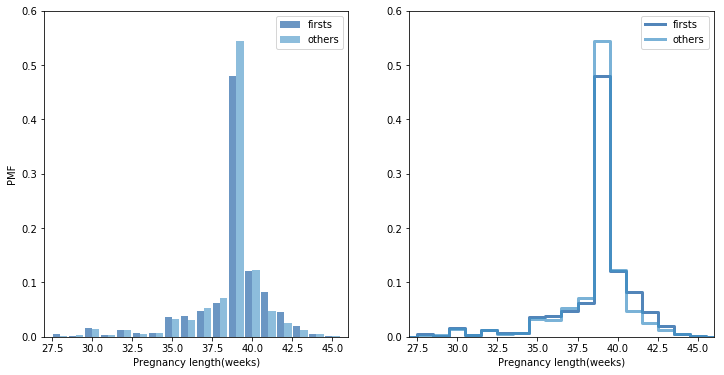

In [74]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

In week:  35  diff:  0.392853886867  probability of first:  0.0360299116247  other:  0.0321013727561
In week:  36  diff:  0.750796042508  probability of first:  0.0389757534557  other:  0.0314677930306
In week:  37  diff:  -0.503126143335  probability of first:  0.0471334692953  other:  0.0521647307286
In week:  38  diff:  -0.911366077618  probability of first:  0.0616360752323  other:  0.0707497360084
In week:  39  diff:  -6.56281682875  probability of first:  0.479039202357  other:  0.544667370644
In week:  40  diff:  -0.103275553102  probability of first:  0.121459324722  other:  0.122492080253
In week:  41  diff:  3.36362925034  probability of first:  0.0815771583956  other:  0.0479408658923
In week:  42  diff:  2.04768908986  probability of first:  0.046453659642  other:  0.0259767687434
In week:  43  diff:  0.683169219482  probability of first:  0.0197144799456  other:  0.0128827877508
In week:  44  diff:  0.0354429446837  probability of first:  0.00521187400861  other:  0.004857

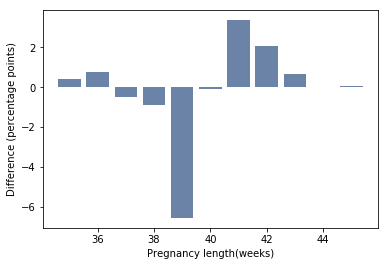

In [90]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
    print("In week: ", week, " diff: ", diff, " probability of first: ", p1, " other: ", p2)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')


### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [119]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')
pmf

Pmf({7: 0.12307692307692308, 12: 0.12307692307692308, 17: 0.2153846153846154, 22: 0.06153846153846154, 27: 0.09230769230769231, 32: 0.18461538461538463, 37: 0.12307692307692308, 42: 0.046153846153846156, 47: 0.03076923076923077})

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [120]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

Pmf({7: 0.03636363636363637, 12: 0.062337662337662345, 17: 0.15454545454545457, 22: 0.05714285714285715, 27: 0.1051948051948052, 32: 0.24935064935064938, 37: 0.1922077922077922, 42: 0.08181818181818183, 47: 0.061038961038961045})


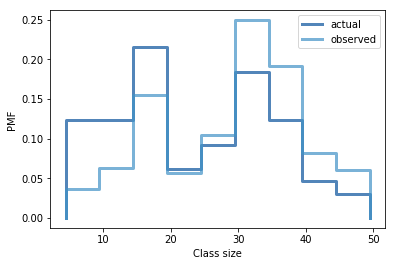

In [121]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
print(biased_pmf)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

The observed mean is substantially higher than the actual.

In [122]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [123]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

We can unbias the biased PMF:

In [124]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

Unbiased mean 23.69230769230769


And plot the two distributions to confirm they are the same.

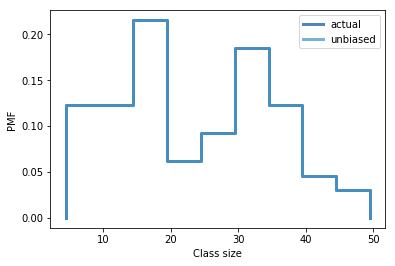

In [125]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

### Pandas indexing

Here's an example of a small DataFrame.

In [127]:
import numpy as np
import pandas
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,-0.321036,-0.295411
1,0.280652,-0.144831
2,0.400955,0.323117
3,0.081630,0.140458


We can specify column names when we create the DataFrame:

In [128]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,-0.321036,-0.295411
1,0.280652,-0.144831
2,0.400955,0.323117
3,0.081630,0.140458


We can also specify an index that contains labels for the rows.

In [129]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-0.321036,-0.295411
b,0.280652,-0.144831
c,0.400955,0.323117
d,0.081630,0.140458


Normal indexing selects columns.

In [130]:
df['A']

a   -0.321036
b    0.280652
c    0.400955
d    0.081630
Name: A, dtype: float64

We can use the `loc` attribute to select rows.

In [131]:
df.loc['a']

A   -0.321036
B   -0.295411
Name: a, dtype: float64

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [132]:
df.iloc[0]

A   -0.321036
B   -0.295411
Name: a, dtype: float64

`loc` can also take a list of labels.

In [133]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,-0.321036,-0.295411
c,0.400955,0.323117


If you provide a slice of labels, `DataFrame` uses it to select rows.

In [134]:
df['a':'c']

,A,B
a,-0.321036,-0.295411
b,0.280652,-0.144831
c,0.400955,0.323117


If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [135]:
df[0:2]

,A,B
a,-0.321036,-0.295411
b,0.280652,-0.144831


But notice that one method includes the last elements of the slice and one does not.

In general, I recommend giving labels to the rows and names to the columns, and using them consistently.

## Exercises

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [158]:
resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


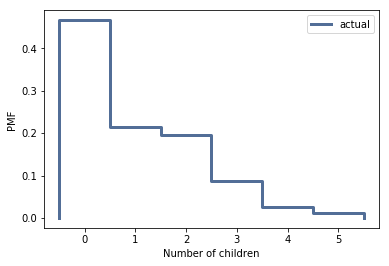

In [160]:
families_minor_pmf = thinkstats2.Pmf(resp.numkdhh, label='actual')

thinkplot.Pmf(families_minor_pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166})


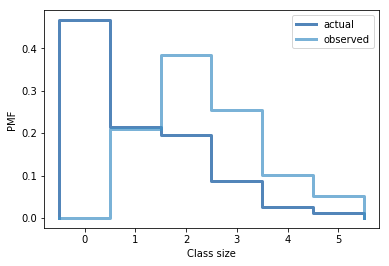

In [161]:
biased_families_minor_pmf = BiasPmf(families_minor_pmf, label='observed')
thinkplot.PrePlot(2)
print(biased_families_minor_pmf)
thinkplot.Pmfs([families_minor_pmf, biased_families_minor_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

In [163]:
families_minor_pmf.Mean(), biased_families_minor_pmf.Mean()

(1.0242051550438309, 2.4036791006642821)

**Exercise:** I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [164]:
live, firsts, others = first.MakeFrames()

In [167]:
preg_map = nsfg.MakePregMap(live)

AttributeError: 'collections.defaultdict' object has no attribute 'value_counts'

In [176]:
# Solution goes here
hist = thinkstats2.Hist()

for caseid, indices in preg_map.items():
    if len(indices) >= 2:
        pair = preg.loc[indices[0:2]].prglngth
        diff = np.diff(pair)[0]
        print("caseidindex", caseid, " ind ", indices, " pair ", pair, " diff ", diff)
        hist[diff] += 1

caseidindex 1  ind  [0, 1]  pair  0    39
1    39
Name: prglngth, dtype: int64  diff  0
caseidindex 2  ind  [2, 3, 4]  pair  2    39
3    39
Name: prglngth, dtype: int64  diff  0
caseidindex 6  ind  [5, 6, 7]  pair  5    38
6    40
Name: prglngth, dtype: int64  diff  2
caseidindex 7  ind  [8, 9]  pair  8    39
9    35
Name: prglngth, dtype: int64  diff  -4
caseidindex 14  ind  [11, 12]  pair  11    39
12    37
Name: prglngth, dtype: int64  diff  -2
caseidindex 15  ind  [15, 16]  pair  15    33
16    33
Name: prglngth, dtype: int64  diff  0
caseidindex 21  ind  [19, 20]  pair  19    41
20    39
Name: prglngth, dtype: int64  diff  -2
caseidindex 24  ind  [23, 24, 25]  pair  23    39
24    39
Name: prglngth, dtype: int64  diff  0
caseidindex 31  ind  [27, 28, 29]  pair  27    42
28    37
Name: prglngth, dtype: int64  diff  -5
caseidindex 38  ind  [32, 33, 34]  pair  32    38
33    39
Name: prglngth, dtype: int64  diff  1
caseidindex 44  ind  [39, 40]  pair  39    39
40    36
Name: prglngt

caseidindex 1161  ind  [1297, 1298]  pair  1297    32
1298    39
Name: prglngth, dtype: int64  diff  7
caseidindex 1169  ind  [1309, 1310, 1311, 1312, 1314, 1315, 1316, 1317, 1318, 1319]  pair  1309    36
1310    38
Name: prglngth, dtype: int64  diff  2
caseidindex 1171  ind  [1320, 1321]  pair  1320    39
1321    39
Name: prglngth, dtype: int64  diff  0
caseidindex 1176  ind  [1327, 1328, 1329]  pair  1327    40
1328    40
Name: prglngth, dtype: int64  diff  0
caseidindex 1185  ind  [1330, 1332]  pair  1330    39
1332    38
Name: prglngth, dtype: int64  diff  -1
caseidindex 1190  ind  [1333, 1335]  pair  1333    39
1335    41
Name: prglngth, dtype: int64  diff  2
caseidindex 1191  ind  [1337, 1338, 1339]  pair  1337    30
1338    32
Name: prglngth, dtype: int64  diff  2
caseidindex 1203  ind  [1344, 1345]  pair  1344    37
1345    40
Name: prglngth, dtype: int64  diff  3
caseidindex 1204  ind  [1346, 1347, 1348]  pair  1346    40
1347    38
Name: prglngth, dtype: int64  diff  -2
casei

Name: prglngth, dtype: int64  diff  0
caseidindex 2004  ind  [2232, 2233]  pair  2232    39
2233    39
Name: prglngth, dtype: int64  diff  0
caseidindex 2009  ind  [2238, 2239]  pair  2238    36
2239    39
Name: prglngth, dtype: int64  diff  3
caseidindex 2012  ind  [2244, 2245, 2246]  pair  2244    42
2245    40
Name: prglngth, dtype: int64  diff  -2
caseidindex 2013  ind  [2248, 2250, 2251]  pair  2248    40
2250    40
Name: prglngth, dtype: int64  diff  0
caseidindex 2016  ind  [2253, 2254]  pair  2253    39
2254    39
Name: prglngth, dtype: int64  diff  0
caseidindex 2018  ind  [2258, 2260]  pair  2258    39
2260    39
Name: prglngth, dtype: int64  diff  0
caseidindex 2019  ind  [2261, 2262]  pair  2261    39
2262    38
Name: prglngth, dtype: int64  diff  -1
caseidindex 2022  ind  [2263, 2264]  pair  2263    37
2264    37
Name: prglngth, dtype: int64  diff  0
caseidindex 2026  ind  [2266, 2267]  pair  2266    39
2267    39
Name: prglngth, dtype: int64  diff  0
caseidindex 2027  ind

Name: prglngth, dtype: int64  diff  -2
caseidindex 2727  ind  [3078, 3079]  pair  3078    39
3079    39
Name: prglngth, dtype: int64  diff  0
caseidindex 2730  ind  [3080, 3083, 3084]  pair  3080    39
3083    39
Name: prglngth, dtype: int64  diff  0
caseidindex 2732  ind  [3085, 3086, 3089, 3090, 3091]  pair  3085    39
3086    39
Name: prglngth, dtype: int64  diff  0
caseidindex 2733  ind  [3092, 3093]  pair  3092    37
3093    37
Name: prglngth, dtype: int64  diff  0
caseidindex 2741  ind  [3098, 3100, 3101, 3102]  pair  3098    41
3100    40
Name: prglngth, dtype: int64  diff  -1
caseidindex 2745  ind  [3105, 3106, 3107, 3108]  pair  3105    39
3106    30
Name: prglngth, dtype: int64  diff  -9
caseidindex 2753  ind  [3114, 3115]  pair  3114    43
3115    41
Name: prglngth, dtype: int64  diff  -2
caseidindex 2754  ind  [3116, 3119]  pair  3116    38
3119    38
Name: prglngth, dtype: int64  diff  0
caseidindex 2763  ind  [3122, 3124]  pair  3122    39
3124    39
Name: prglngth, dtype

caseidindex 3488  ind  [3933, 3934]  pair  3933    40
3934    38
Name: prglngth, dtype: int64  diff  -2
caseidindex 3497  ind  [3938, 3939]  pair  3938    42
3939    40
Name: prglngth, dtype: int64  diff  -2
caseidindex 3498  ind  [3940, 3941, 3942, 3943, 3946]  pair  3940    39
3941    39
Name: prglngth, dtype: int64  diff  0
caseidindex 3508  ind  [3947, 3948]  pair  3947    39
3948    39
Name: prglngth, dtype: int64  diff  0
caseidindex 3516  ind  [3950, 3952]  pair  3950    37
3952    39
Name: prglngth, dtype: int64  diff  2
caseidindex 3520  ind  [3955, 3956, 3957]  pair  3955    40
3956    41
Name: prglngth, dtype: int64  diff  1
caseidindex 3521  ind  [3959, 3960]  pair  3959    39
3960    42
Name: prglngth, dtype: int64  diff  3
caseidindex 3523  ind  [3962, 3963, 3964, 3965]  pair  3962    39
3963    39
Name: prglngth, dtype: int64  diff  0
caseidindex 3534  ind  [3977, 3978]  pair  3977    42
3978    38
Name: prglngth, dtype: int64  diff  -4
caseidindex 3537  ind  [3980, 3981

Name: prglngth, dtype: int64  diff  0
caseidindex 4168  ind  [4654, 4655, 4656, 4657]  pair  4654    28
4655    40
Name: prglngth, dtype: int64  diff  12
caseidindex 4169  ind  [4659, 4662]  pair  4659    31
4662    37
Name: prglngth, dtype: int64  diff  6
caseidindex 4171  ind  [4663, 4664, 4665, 4666]  pair  4663    39
4664    39
Name: prglngth, dtype: int64  diff  0
caseidindex 4175  ind  [4668, 4669, 4670, 4672]  pair  4668    38
4669    40
Name: prglngth, dtype: int64  diff  2
caseidindex 4184  ind  [4675, 4677]  pair  4675    38
4677    38
Name: prglngth, dtype: int64  diff  0
caseidindex 4192  ind  [4678, 4679]  pair  4678    40
4679    40
Name: prglngth, dtype: int64  diff  0
caseidindex 4193  ind  [4681, 4682]  pair  4681    38
4682    37
Name: prglngth, dtype: int64  diff  -1
caseidindex 4196  ind  [4685, 4687]  pair  4685    40
4687    38
Name: prglngth, dtype: int64  diff  -2
caseidindex 4197  ind  [4688, 4689]  pair  4688    36
4689    39
Name: prglngth, dtype: int64  diff

caseidindex 5205  ind  [5681, 5682, 5683, 5684]  pair  5681    31
5682    39
Name: prglngth, dtype: int64  diff  8
caseidindex 5206  ind  [5685, 5686, 5687]  pair  5685    43
5686    39
Name: prglngth, dtype: int64  diff  -4
caseidindex 5209  ind  [5688, 5689]  pair  5688    43
5689    39
Name: prglngth, dtype: int64  diff  -4
caseidindex 5210  ind  [5690, 5691]  pair  5690    39
5691    42
Name: prglngth, dtype: int64  diff  3
caseidindex 5212  ind  [5692, 5693, 5694]  pair  5692    39
5693    39
Name: prglngth, dtype: int64  diff  0
caseidindex 5220  ind  [5698, 5699]  pair  5698    40
5699    42
Name: prglngth, dtype: int64  diff  2
caseidindex 5222  ind  [5700, 5702]  pair  5700    43
5702    35
Name: prglngth, dtype: int64  diff  -8
caseidindex 5225  ind  [5706, 5707]  pair  5706    36
5707    37
Name: prglngth, dtype: int64  diff  1
caseidindex 5238  ind  [5712, 5714]  pair  5712    39
5714    39
Name: prglngth, dtype: int64  diff  0
caseidindex 5243  ind  [5715, 5716]  pair  571

caseidindex 5888  ind  [6487, 6488]  pair  6487    36
6488    40
Name: prglngth, dtype: int64  diff  4
caseidindex 5894  ind  [6493, 6494]  pair  6493    39
6494    38
Name: prglngth, dtype: int64  diff  -1
caseidindex 5898  ind  [6498, 6499]  pair  6498    39
6499    39
Name: prglngth, dtype: int64  diff  0
caseidindex 5901  ind  [6500, 6501]  pair  6500    39
6501    39
Name: prglngth, dtype: int64  diff  0
caseidindex 5904  ind  [6503, 6504, 6505]  pair  6503    39
6504    38
Name: prglngth, dtype: int64  diff  -1
caseidindex 5905  ind  [6506, 6507, 6508]  pair  6506    41
6507    37
Name: prglngth, dtype: int64  diff  -4
caseidindex 5911  ind  [6512, 6513, 6514, 6515]  pair  6512    39
6513    39
Name: prglngth, dtype: int64  diff  0
caseidindex 5917  ind  [6517, 6518]  pair  6517    40
6518    40
Name: prglngth, dtype: int64  diff  0
caseidindex 5923  ind  [6519, 6520]  pair  6519    39
6520    39
Name: prglngth, dtype: int64  diff  0
caseidindex 5926  ind  [6525, 6526]  pair  652

Name: prglngth, dtype: int64  diff  0
caseidindex 6705  ind  [7398, 7399, 7400]  pair  7398    41
7399    37
Name: prglngth, dtype: int64  diff  -4
caseidindex 6707  ind  [7401, 7402, 7403]  pair  7401    38
7402    38
Name: prglngth, dtype: int64  diff  0
caseidindex 6712  ind  [7409, 7410]  pair  7409    42
7410    36
Name: prglngth, dtype: int64  diff  -6
caseidindex 6715  ind  [7412, 7413, 7415]  pair  7412    39
7413    39
Name: prglngth, dtype: int64  diff  0
caseidindex 6716  ind  [7416, 7417]  pair  7416    39
7417    39
Name: prglngth, dtype: int64  diff  0
caseidindex 6719  ind  [7420, 7421]  pair  7420    41
7421    35
Name: prglngth, dtype: int64  diff  -6
caseidindex 6725  ind  [7424, 7425]  pair  7424    39
7425    39
Name: prglngth, dtype: int64  diff  0
caseidindex 6731  ind  [7426, 7427]  pair  7426    36
7427    39
Name: prglngth, dtype: int64  diff  3
caseidindex 6733  ind  [7428, 7430, 7431]  pair  7428    32
7430    41
Name: prglngth, dtype: int64  diff  9
caseidin

Name: prglngth, dtype: int64  diff  2
caseidindex 7421  ind  [8108, 8109, 8110]  pair  8108    39
8109    39
Name: prglngth, dtype: int64  diff  0
caseidindex 7427  ind  [8112, 8114]  pair  8112    36
8114    40
Name: prglngth, dtype: int64  diff  4
caseidindex 7434  ind  [8115, 8116, 8117]  pair  8115    37
8116    37
Name: prglngth, dtype: int64  diff  0
caseidindex 7441  ind  [8121, 8122, 8123, 8125]  pair  8121    39
8122    39
Name: prglngth, dtype: int64  diff  0
caseidindex 7444  ind  [8127, 8128, 8129, 8130, 8131, 8132, 8133]  pair  8127    35
8128    39
Name: prglngth, dtype: int64  diff  4
caseidindex 7450  ind  [8139, 8140]  pair  8139    41
8140    39
Name: prglngth, dtype: int64  diff  -2
caseidindex 7470  ind  [8152, 8153]  pair  8152    36
8153    38
Name: prglngth, dtype: int64  diff  2
caseidindex 7473  ind  [8157, 8161, 8162]  pair  8157    39
8161    39
Name: prglngth, dtype: int64  diff  0
caseidindex 7478  ind  [8164, 8166, 8167]  pair  8164    40
8166    39
Name: 

Name: prglngth, dtype: int64  diff  0
caseidindex 8337  ind  [9081, 9082]  pair  9081    41
9082    36
Name: prglngth, dtype: int64  diff  -5
caseidindex 8339  ind  [9083, 9084, 9085]  pair  9083    39
9084    39
Name: prglngth, dtype: int64  diff  0
caseidindex 8345  ind  [9087, 9089]  pair  9087    41
9089    41
Name: prglngth, dtype: int64  diff  0
caseidindex 8347  ind  [9090, 9091]  pair  9090    40
9091    39
Name: prglngth, dtype: int64  diff  -1
caseidindex 8348  ind  [9092, 9093, 9094]  pair  9092    39
9093    39
Name: prglngth, dtype: int64  diff  0
caseidindex 8349  ind  [9095, 9098, 9099]  pair  9095    30
9098    35
Name: prglngth, dtype: int64  diff  5
caseidindex 8352  ind  [9102, 9104]  pair  9102    37
9104    40
Name: prglngth, dtype: int64  diff  3
caseidindex 8355  ind  [9105, 9106, 9108]  pair  9105    39
9106    39
Name: prglngth, dtype: int64  diff  0
caseidindex 8360  ind  [9110, 9112]  pair  9110    36
9112    37
Name: prglngth, dtype: int64  diff  1
caseidind

caseidindex 9157  ind  [9904, 9905, 9907, 9910]  pair  9904    39
9905    39
Name: prglngth, dtype: int64  diff  0
caseidindex 9158  ind  [9913, 9915, 9916]  pair  9913    40
9915    40
Name: prglngth, dtype: int64  diff  0
caseidindex 9160  ind  [9917, 9918]  pair  9917    39
9918    39
Name: prglngth, dtype: int64  diff  0
caseidindex 9161  ind  [9919, 9921, 9922]  pair  9919    39
9921    39
Name: prglngth, dtype: int64  diff  0
caseidindex 9166  ind  [9923, 9924]  pair  9923    39
9924    39
Name: prglngth, dtype: int64  diff  0
caseidindex 9169  ind  [9925, 9927]  pair  9925    37
9927    37
Name: prglngth, dtype: int64  diff  0
caseidindex 9171  ind  [9929, 9930]  pair  9929    39
9930    39
Name: prglngth, dtype: int64  diff  0
caseidindex 9174  ind  [9931, 9932, 9933, 9934]  pair  9931    39
9932    39
Name: prglngth, dtype: int64  diff  0
caseidindex 9176  ind  [9936, 9937]  pair  9936    37
9937    36
Name: prglngth, dtype: int64  diff  -1
caseidindex 9181  ind  [9939, 9940, 

Name: prglngth, dtype: int64  diff  -2
caseidindex 9937  ind  [10794, 10795]  pair  10794    39
10795    35
Name: prglngth, dtype: int64  diff  -4
caseidindex 9949  ind  [10799, 10800]  pair  10799    40
10800    40
Name: prglngth, dtype: int64  diff  0
caseidindex 9950  ind  [10801, 10802]  pair  10801    39
10802    38
Name: prglngth, dtype: int64  diff  -1
caseidindex 9951  ind  [10803, 10805, 10806, 10807, 10808, 10809]  pair  10803    30
10805    39
Name: prglngth, dtype: int64  diff  9
caseidindex 9960  ind  [10814, 10815]  pair  10814    39
10815    36
Name: prglngth, dtype: int64  diff  -3
caseidindex 9963  ind  [10816, 10817, 10818, 10819]  pair  10816    39
10817    39
Name: prglngth, dtype: int64  diff  0
caseidindex 9971  ind  [10821, 10822, 10823, 10824, 10825, 10826]  pair  10821    39
10822    39
Name: prglngth, dtype: int64  diff  0
caseidindex 9974  ind  [10829, 10830]  pair  10829    39
10830    39
Name: prglngth, dtype: int64  diff  0
caseidindex 9986  ind  [10838, 1

Name: prglngth, dtype: int64  diff  0
caseidindex 10810  ind  [11735, 11736, 11737]  pair  11735    40
11736    39
Name: prglngth, dtype: int64  diff  -1
caseidindex 10813  ind  [11741, 11742]  pair  11741    38
11742    40
Name: prglngth, dtype: int64  diff  2
caseidindex 10819  ind  [11745, 11746]  pair  11745    41
11746    41
Name: prglngth, dtype: int64  diff  0
caseidindex 10824  ind  [11750, 11751, 11752]  pair  11750    32
11751    40
Name: prglngth, dtype: int64  diff  8
caseidindex 10827  ind  [11754, 11755]  pair  11754    41
11755    39
Name: prglngth, dtype: int64  diff  -2
caseidindex 10828  ind  [11756, 11757, 11758]  pair  11756    39
11757    39
Name: prglngth, dtype: int64  diff  0
caseidindex 10834  ind  [11764, 11765]  pair  11764    42
11765    42
Name: prglngth, dtype: int64  diff  0
caseidindex 10836  ind  [11768, 11770, 11771]  pair  11768    39
11770    39
Name: prglngth, dtype: int64  diff  0
caseidindex 10838  ind  [11773, 11774, 11775, 11776]  pair  11773   

caseidindex 11678  ind  [12637, 12639, 12640, 12641, 12642]  pair  12637    39
12639    39
Name: prglngth, dtype: int64  diff  0
caseidindex 11681  ind  [12646, 12647, 12648, 12649]  pair  12646    39
12647    39
Name: prglngth, dtype: int64  diff  0
caseidindex 11691  ind  [12652, 12654]  pair  12652    39
12654    35
Name: prglngth, dtype: int64  diff  -4
caseidindex 11700  ind  [12657, 12658]  pair  12657    34
12658    34
Name: prglngth, dtype: int64  diff  0
caseidindex 11701  ind  [12659, 12660]  pair  12659    40
12660    39
Name: prglngth, dtype: int64  diff  -1
caseidindex 11704  ind  [12663, 12664, 12666]  pair  12663    41
12664    41
Name: prglngth, dtype: int64  diff  0
caseidindex 11706  ind  [12667, 12670]  pair  12667    40
12670    40
Name: prglngth, dtype: int64  diff  0
caseidindex 11707  ind  [12673, 12674, 12675, 12676, 12677]  pair  12673    42
12674    39
Name: prglngth, dtype: int64  diff  -3
caseidindex 11709  ind  [12679, 12680]  pair  12679    30
12680    39


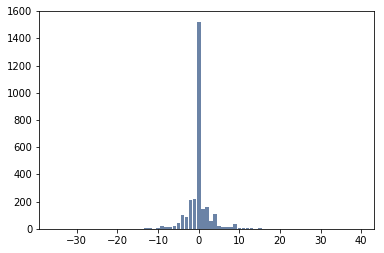

In [178]:
# Solution goes here
thinkplot.Hist(hist)

In [188]:
# Solution goes here

pmf = thinkstats2.Pmf(hist)
pmf.Mean()

-0.056367432150313125

**Exercise:** In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [189]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

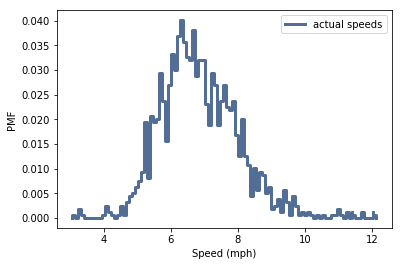

In [190]:
pmf = thinkstats2.Pmf(speeds, 'actual speeds')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

In [192]:
# Solution goes here
def ObservedPmf(pmf, speed, label):
    """Returns a new Pmf representing speeds observed at a given speed.

    The chance of observing a runner is proportional to the difference
    in speed.

    Args:
        pmf: distribution of actual speeds
        speed: speed of the observing runner
        label: string label for the new dist

    Returns:
        Pmf object
    """
    new = pmf.Copy(label=label)
    for val in new.Values():
        diff = abs(val - speed)
        new[val] *= diff
    new.Normalize()
    return new

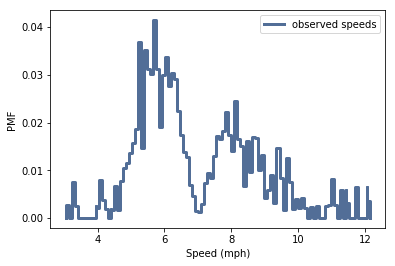

In [193]:
# Solution goes here

biased = ObservedPmf(pmf, 7, label='observed speeds')
thinkplot.Pmf(biased)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')